In [133]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [134]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")
device = "cpu"

In [135]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008 # but I want to use 42! :(
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [136]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    y = x**2 + 4*x - 3
    # placeholder
    #y = torch.ones(data_size,1)
    return x,y

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    y = x**3 + 4*x**2 - 3
    # placeholder
    #y = torch.ones(data_size, 1)
    return x, y

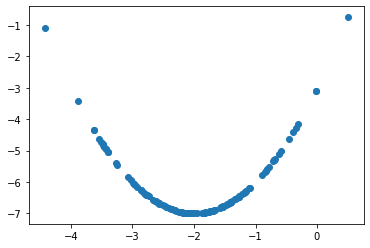

In [138]:
# Generate the data with 128 datapoints
x, y = quadratic_data_generator(128)
plt.scatter(x, y)
plt.show()

In [139]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        n_in_dim  = 1
        n_out_dim = 1
        self.classifier = nn.Sequential(nn.Linear(n_in_dim, n_out_dim, bias=True))

    def forward(self, x):
        return self.classifier(x)

In [140]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_1H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        n_in_dim  = 1
        n_hidden  = 5
        n_out_dim = 1
        self.classifier = nn.Sequential(nn.Linear(n_in_dim, n_hidden, bias=True),
                                        nn.ReLU(),
                                        nn.Linear(n_hidden, n_out_dim, bias=True))

    def forward(self, x):
        return self.classifier(x)

In [141]:
# Define a Linear Classifier with a two hidden layers of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        n_in_dim  = 1
        n_hidden  = 5
        n_out_dim = 1
        self.classifier = nn.Sequential(nn.Linear(n_in_dim, n_hidden, bias=True),
                                        nn.ReLU(),
                                        nn.Linear(n_hidden, n_hidden, bias=True),
                                        nn.ReLU(),
                                        nn.Linear(n_hidden, n_out_dim, bias=True))

    def forward(self, x):
        return self.classifier(x)

In [142]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    
    # TODO: Define MSE loss function
    criterion = torch.nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
        y_pred = model(x)
        
        # TODO: Compute loss in terms of predicted and true y
        loss = criterion(y_pred, y)

        # TODO: Zero gradient
        optimizer.zero_grad()
        
        # TODO: call backward on loss
        loss.backward()
        
        # TODO: step the optimizer
        optimizer.step()
        
        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

Epoch 100 loss: 3.3711137771606445
Epoch 200 loss: 2.3772685527801514
Epoch 300 loss: 1.844477653503418
Epoch 400 loss: 1.5588537454605103
Epoch 500 loss: 1.40573251247406
Epoch 600 loss: 1.3236454725265503
Epoch 700 loss: 1.2796399593353271
Epoch 800 loss: 1.2560487985610962
Epoch 900 loss: 1.2434017658233643
Epoch 1000 loss: 1.2366219758987427
Epoch 1100 loss: 1.2329871654510498
Epoch 1200 loss: 1.2310388088226318
Epoch 1300 loss: 1.2299941778182983
Epoch 1400 loss: 1.2294342517852783
Epoch 1500 loss: 1.2291340827941895
Epoch 1600 loss: 1.2289732694625854
Epoch 1700 loss: 1.2288868427276611
Epoch 1800 loss: 1.2288405895233154
Epoch 1900 loss: 1.2288159132003784
Epoch 2000 loss: 1.2288024425506592
Epoch 2100 loss: 1.2287952899932861
Epoch 2200 loss: 1.22879159450531
Epoch 2300 loss: 1.2287894487380981
Epoch 2400 loss: 1.2287884950637817
Epoch 2500 loss: 1.228787899017334
Epoch 2600 loss: 1.2287874221801758
Epoch 2700 loss: 1.2287873029708862
Epoch 2800 loss: 1.2287871837615967
Epoch 2

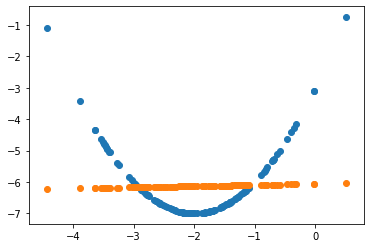

In [143]:
# 0H model on quadratic data
model = Linear_0H()
y_pred = train(model, epochs=5000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 1.8421375751495361
Epoch 200 loss: 0.8967396020889282
Epoch 300 loss: 0.6937336325645447
Epoch 400 loss: 0.5439189672470093
Epoch 500 loss: 0.421184241771698
Epoch 600 loss: 0.32466602325439453
Epoch 700 loss: 0.2539372742176056
Epoch 800 loss: 0.20531223714351654
Epoch 900 loss: 0.17387786507606506
Epoch 1000 loss: 0.15422366559505463
Epoch 1100 loss: 0.14211899042129517
Epoch 1200 loss: 0.13478784263134003
Epoch 1300 loss: 0.13035809993743896
Epoch 1400 loss: 0.12761284410953522
Epoch 1500 loss: 0.1259051114320755
Epoch 1600 loss: 0.12483936548233032
Epoch 1700 loss: 0.12417392432689667
Epoch 1800 loss: 0.12375792860984802
Epoch 1900 loss: 0.12349807471036911
Epoch 2000 loss: 0.1233353391289711
Epoch 2100 loss: 0.12323378771543503
Epoch 2200 loss: 0.12317024171352386
Epoch 2300 loss: 0.12313047796487808
Epoch 2400 loss: 0.12310560792684555
Epoch 2500 loss: 0.12309005856513977
Epoch 2600 loss: 0.12308037281036377
Epoch 2700 loss: 0.12307433784008026
Epoch 2800 loss: 0.

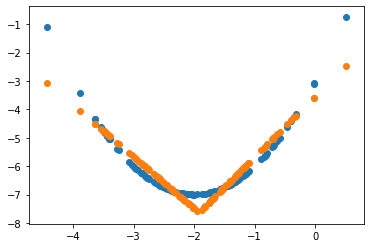

In [144]:
# 1H model on quadratic data
model = Linear_1H()
y_pred = train(model, epochs=5000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 0.8756209015846252
Epoch 200 loss: 0.49808043241500854
Epoch 300 loss: 0.25652876496315
Epoch 400 loss: 0.5319381952285767
Epoch 500 loss: 0.3199235200881958
Epoch 600 loss: 0.183993399143219
Epoch 700 loss: 0.10868699848651886
Epoch 800 loss: 0.07719291746616364
Epoch 900 loss: 0.05209778621792793
Epoch 1000 loss: 0.05052643269300461
Epoch 1100 loss: 0.04445529356598854
Epoch 1200 loss: 0.041218891739845276
Epoch 1300 loss: 0.03902701288461685
Epoch 1400 loss: 0.03643965721130371
Epoch 1500 loss: 0.03455323353409767
Epoch 1600 loss: 0.03306347504258156
Epoch 1700 loss: 0.0319783017039299
Epoch 1800 loss: 0.031131364405155182
Epoch 1900 loss: 0.03053835779428482
Epoch 2000 loss: 0.030102213844656944
Epoch 2100 loss: 0.029519004747271538
Epoch 2200 loss: 0.02889963798224926
Epoch 2300 loss: 0.027991607785224915
Epoch 2400 loss: 0.02729787863790989
Epoch 2500 loss: 0.026801299303770065
Epoch 2600 loss: 0.02645965851843357
Epoch 2700 loss: 0.026210550218820572
Epoch 2800 l

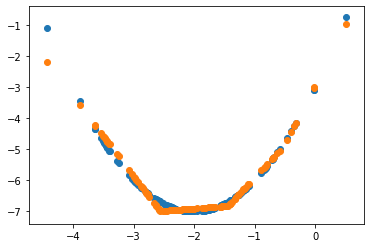

In [145]:
# 2H model on quadratic data
model = Linear_2H()
y_pred = train(model, epochs=5000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [146]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

Epoch 100 loss: 11.475406646728516
Epoch 200 loss: 11.475062370300293
Epoch 300 loss: 11.474907875061035
Epoch 400 loss: 11.474836349487305
Epoch 500 loss: 11.47480583190918
Epoch 600 loss: 11.474791526794434
Epoch 700 loss: 11.474785804748535
Epoch 800 loss: 11.474782943725586
Epoch 900 loss: 11.474781036376953
Epoch 1000 loss: 11.474780082702637
Epoch 1100 loss: 11.474781036376953
Epoch 1200 loss: 11.47477912902832
Epoch 1300 loss: 11.474780082702637
Epoch 1400 loss: 11.474780082702637
Epoch 1500 loss: 11.474781036376953
Epoch 1600 loss: 11.474780082702637
Epoch 1700 loss: 11.474780082702637
Epoch 1800 loss: 11.47477912902832
Epoch 1900 loss: 11.474780082702637
Epoch 2000 loss: 11.474780082702637
Epoch 2100 loss: 11.474780082702637
Epoch 2200 loss: 11.47477912902832
Epoch 2300 loss: 11.474780082702637
Epoch 2400 loss: 11.47477912902832
Epoch 2500 loss: 11.47477912902832
Epoch 2600 loss: 11.47477912902832
Epoch 2700 loss: 11.47477912902832
Epoch 2800 loss: 11.47477912902832
Epoch 2900

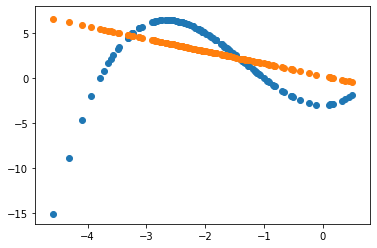

In [147]:
# 0H model on cubic data
model = Linear_0H()
y_pred = train(model, epochs=5000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 11.065258979797363
Epoch 200 loss: 10.081028938293457
Epoch 300 loss: 9.14636516571045
Epoch 400 loss: 8.296001434326172
Epoch 500 loss: 7.267083644866943
Epoch 600 loss: 5.939031600952148
Epoch 700 loss: 5.042836666107178
Epoch 800 loss: 4.616409778594971
Epoch 900 loss: 4.3060102462768555
Epoch 1000 loss: 4.031953811645508
Epoch 1100 loss: 3.7845988273620605
Epoch 1200 loss: 5.369885444641113
Epoch 1300 loss: 4.17922830581665
Epoch 1400 loss: 4.036187171936035
Epoch 1500 loss: 4.892762660980225
Epoch 1600 loss: 3.6559035778045654
Epoch 1700 loss: 3.6704068183898926
Epoch 1800 loss: 3.533285617828369
Epoch 1900 loss: 4.857235431671143
Epoch 2000 loss: 3.3565783500671387
Epoch 2100 loss: 3.274815797805786
Epoch 2200 loss: 4.147426605224609
Epoch 2300 loss: 3.217343330383301
Epoch 2400 loss: 3.8943591117858887
Epoch 2500 loss: 4.2257609367370605
Epoch 2600 loss: 2.9315810203552246
Epoch 2700 loss: 4.04612922668457
Epoch 2800 loss: 3.864124059677124
Epoch 2900 loss: 3.762

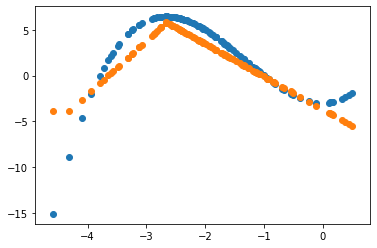

In [148]:
# 1H model on cubic data
model = Linear_1H()
y_pred = train(model, epochs=5000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 11.346467971801758
Epoch 200 loss: 9.454873085021973
Epoch 300 loss: 8.894957542419434
Epoch 400 loss: 7.654534816741943
Epoch 500 loss: 5.536269664764404
Epoch 600 loss: 4.404494762420654
Epoch 700 loss: 3.4877700805664062
Epoch 800 loss: 2.455198287963867
Epoch 900 loss: 1.832618236541748
Epoch 1000 loss: 1.3382633924484253
Epoch 1100 loss: 1.4623385667800903
Epoch 1200 loss: 1.1235336065292358
Epoch 1300 loss: 0.77713942527771
Epoch 1400 loss: 0.5770329236984253
Epoch 1500 loss: 0.4166645109653473
Epoch 1600 loss: 0.26890814304351807
Epoch 1700 loss: 0.23934027552604675
Epoch 1800 loss: 0.23114825785160065
Epoch 1900 loss: 0.22884078323841095
Epoch 2000 loss: 0.22259724140167236
Epoch 2100 loss: 0.21954317390918732
Epoch 2200 loss: 0.2172032594680786
Epoch 2300 loss: 0.19260358810424805
Epoch 2400 loss: 0.18352322280406952
Epoch 2500 loss: 0.1566774845123291
Epoch 2600 loss: 0.18244563043117523
Epoch 2700 loss: 0.2997033894062042
Epoch 2800 loss: 0.2522963881492615
E

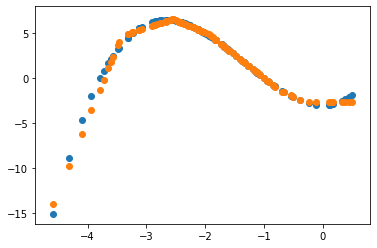

In [149]:
# 2H model on cubic data
model = Linear_2H()
y_pred = train(model, epochs=5000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()